## 2300 extensions
Reads in data from historical, SSP 5-8.5 + SSP5-3.4OS & SSP extensions

b.e21.BWSSP585extcmip6.f09_g17.CMIP6-SSP5-8.5ext-WACCM.001

b.e21.BWSSP534osextcmip6.f09_g17.CMIP6-SSP5-3.4OSext-WACCM.001

plots change in global TOTECOSYSC

In [1]:
import xarray as xr
import cf_units as cf
import numpy as np
import pandas as pd
import esmlab
from ctsm_py import utils
import warnings
warnings.simplefilter("ignore", category=RuntimeWarning)

# some resources for plotting
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.lines as mlines
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
%matplotlib inline

In [2]:
# Point to data
varLND = ['TOTECOSYSC','TBOT']  #TWS not available for CESM1 / CLM4
var = varLND #+ varATM
ens = ['101','102','103']
ssp = ['5-8.5','5-3.4OS']
times = ['195001-199912','200001-201412']

# --- CESM2_ssp cases  (5 ensemble member) ---
histCase = ['b.e21.BWHIST.f09_g17.CMIP6-historical-WACCM']
sspCase = ['b.e21.BWSSP534oscmip6.f09_g17.CMIP6-SSP5-3.4OS-WACCM',
           'b.e21.BWSSP585cmip6.f09_g17.CMIP6-SSP5-8.5-WACCM']
extCase = ['b.e21.BWSSP534osextcmip6.f09_g17.CMIP6-SSP5-3.4OSext-WACCM',
           'b.e21.BWSSP585extcmip6.f09_g17.CMIP6-SSP5-8.5ext-WACCM']
# SSP EXTENSION
ssp   =  ['SSP5-3.4OS','SSP5-8.5']
fileIn = '/glade/scratch/wwieder/'
pattern0 = '/glade/scratch/wwieder/{Case}.001.clm2.h0.TOTECOSYSC.185001-201412.nc'
pattern1 = '/glade/scratch/wwieder/{Case}.001.clm2.h0.TOTECOSYSC.*'#204001-210012.nc'
pattern2 = '/glade/scratch/wwieder/{Case}.001.TOTECOSYSC.nc'
patternHIST = [pattern0.format(Case = histCase) for histCase in histCase]
patternSSP  = [pattern1.format(Case = sspCase ) for sspCase in sspCase]
patternEXT  = [pattern2.format(Case = extCase ) for extCase in extCase]
print(patternHIST)
print(patternSSP)
#ssp5-34os.001  only has 2040-2100 data 

['/glade/scratch/wwieder/b.e21.BWHIST.f09_g17.CMIP6-historical-WACCM.001.clm2.h0.TOTECOSYSC.185001-201412.nc']
['/glade/scratch/wwieder/b.e21.BWSSP534oscmip6.f09_g17.CMIP6-SSP5-3.4OS-WACCM.001.clm2.h0.TOTECOSYSC.*', '/glade/scratch/wwieder/b.e21.BWSSP585cmip6.f09_g17.CMIP6-SSP5-8.5-WACCM.001.clm2.h0.TOTECOSYSC.*']


In [3]:
ds_0  = utils.time_set_mid(xr.open_mfdataset(patternHIST, decode_times=True, 
                                             combine='by_coords'), 'time')
ds_1a = utils.time_set_mid(xr.open_mfdataset(patternSSP[0], decode_times=True, 
                                             combine='by_coords'), 'time')
ds_1b = utils.time_set_mid(xr.open_mfdataset(patternSSP[1], decode_times=True, 
                                             combine='by_coords'), 'time')
ds_2a = utils.time_set_mid(xr.open_mfdataset(patternEXT[0], decode_times=True, 
                                             combine='by_coords'), 'time')
ds_2b = utils.time_set_mid(xr.open_mfdataset(patternEXT[1], decode_times=True, 
                                             combine='by_coords'), 'time')
print(ds_1a.TOTECOSYSC)

<xarray.DataArray 'TOTECOSYSC' (time: 732, lat: 192, lon: 288)>
dask.array<open_dataset-d56d107e6cba8d89eea04b933183de38TOTECOSYSC, shape=(732, 192, 288), dtype=float32, chunksize=(732, 192, 288)>
Coordinates:
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.25 357.5 358.75
  * lat      (lat) float32 -90.0 -89.057594 -88.11518 ... 89.057594 90.0
  * time     (time) object 2040-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    long_name:     total ecosystem carbon, incl veg but excl cpool and produc...
    units:         gC/m^2
    cell_methods:  time: mean


In [4]:
land_up = ds_0.area * ds_0.landfrac #km^2
land_wgt = land_up / land_up.sum(dim=('lat','lon'))
land_area = land_up.values * 1e6  # convert km2 to m2

da_534 = xr.concat([ds_0.TOTECOSYSC,  ds_1a.TOTECOSYSC, ds_2a.TOTECOSYSC],dim='time')
da_585 = xr.concat([ds_0.TOTECOSYSC,  ds_1b.TOTECOSYSC, ds_2b.TOTECOSYSC],dim='time')
print(da_534)
print(da_585)

<xarray.DataArray 'TOTECOSYSC' (time: 5088, lat: 192, lon: 288)>
dask.array<concatenate, shape=(5088, 192, 288), dtype=float32, chunksize=(2376, 192, 288)>
Coordinates:
  * lat      (lat) float32 -90.0 -89.057594 -88.11518 ... 89.057594 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.25 357.5 358.75
  * time     (time) object 1850-01-16 11:45:00 ... 2298-12-16 12:00:00
Attributes:
    long_name:     total ecosystem carbon, incl veg but excl cpool and produc...
    units:         gC/m^2
    cell_methods:  time: mean
<xarray.DataArray 'TOTECOSYSC' (time: 5172, lat: 192, lon: 288)>
dask.array<concatenate, shape=(5172, 192, 288), dtype=float32, chunksize=(2160, 192, 288)>
Coordinates:
  * lat      (lat) float32 -90.0 -89.057594 -88.11518 ... 89.057594 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.25 357.5 358.75
  * time     (time) object 1850-01-16 11:45:00 ... 2280-12-16 12:00:00
Attributes:
    long_name:     total ecosystem carbon, incl veg but

In [5]:
def globalSum ( varIn, area, time, conversion, units ):
    "Global weighted sum of fluxes & states"
    temp = varIn * area * time
    temp = temp.sum(dim=('lat','lon'))  * conversion
    temp.attrs['long_name']= varIn.attrs['long_name']
    temp.attrs['units']= units
    #temp = temp.assign_coords({'time': (ds.time)})
    return (temp)

In [17]:
# Create datasets for results.  Anomalies # detrended
g534 = globalSum(da_534, area = land_area, time = 1,  conversion = 1e-15, 
                 units = 'Pg C') 
g585 = globalSum(da_585, area = land_area, time = 1,  conversion = 1e-15, 
                 units = 'Pg C') 
g534  =  g534  - g534[0]
g585  =  g585  - g585[0]
g534y  = g534.groupby('time.year').mean('time')
g585y  = g585.groupby('time.year').mean('time')
print(g534y)


<xarray.DataArray 'TOTECOSYSC' (year: 424)>
dask.array<stack, shape=(424,), dtype=float32, chunksize=(1,)>
Coordinates:
  * year     (year) int64 1850 1851 1852 1853 1854 ... 2294 2295 2296 2297 2298
Attributes:
    long_name:     total ecosystem carbon, incl veg but excl cpool and produc...
    units:         Pg C
    cell_methods:  time: mean


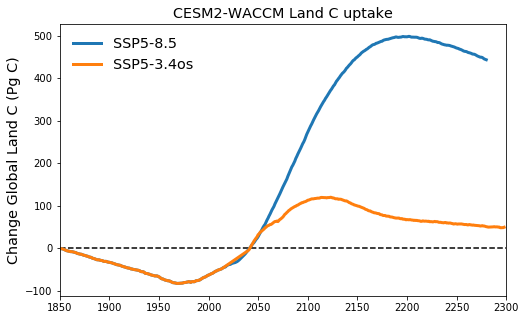

In [18]:
plt.figure(figsize=[8,5])
plt.ylabel('Change Global Land C ('+g585y.units+')', fontsize='x-large')
plt.plot(g585y.year, g585y, lw=3)
plt.plot(g534y.year, g534y, lw=3)
plt.xlim(1850, 2300)
plt.legend(labels=('SSP5-8.5','SSP5-3.4os'), frameon = False, fontsize='x-large')
plt.hlines(y=0, xmin=1850, xmax=2300, linestyles='dashed')
plt.title('CESM2-WACCM Land C uptake', fontsize='x-large');